In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [41]:
class CornerDetector(object):
    def __init__(self):
        self.image = cv2.imread('board.jpg')
        self.image = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        self.gray = cv2.cvtColor(self.image, cv2.COLOR_RGB2GRAY)
        self.gray = np.float32(self.gray)
        self.detected_corners = cv2.cornerHarris(self.gray, 2, 3, 0.04)
        # To enlarge the bright corners
        self.detected_corners = cv2.dilate(self.detected_corners, None)
        # Defining a threshold to detect stronger corners
        self.threshold = 0.1*self.detected_corners.max()
        self.detected_copy = np.copy(self.detected_corners)
        for i in range(0, self.detected_copy.shape[0]):
            for j in range(0, self.detected_copy.shape[1]):
                if self.detected_copy[i, j] >= self.threshold:
                    cv2.circle(self.image, (i, j), 2, (0, 255, 0), 2)
        # Display
        f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 12))
        ax1.set_title("Normal")
        ax1.imshow(self.image, cmap="gray")
        ax2.set_title("Filtered")
        ax2.imshow(self.detected_corners, cmap="gray")
        plt.show()
        print(self.image.shape)

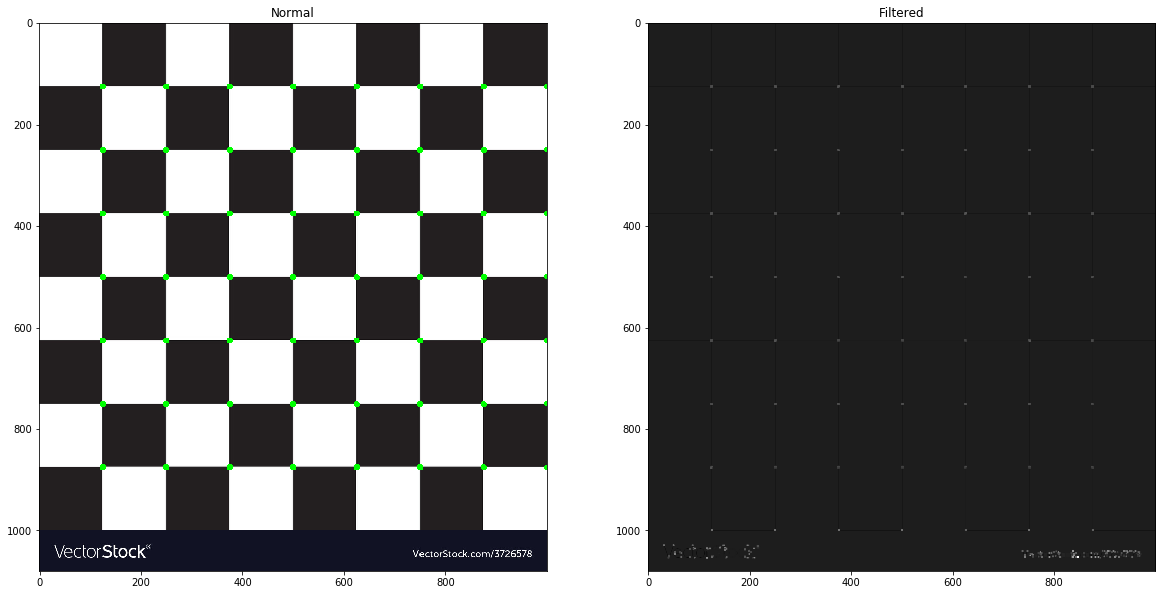

(1080, 1000, 3)


In [42]:
CornerDetector()